<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
cd /content/gdrive/MyDrive//MLTSA22/HW2/Data

/content/gdrive/MyDrive/MLTSA22/HW2/Data


In [6]:
files = glob.glob("Data/Stocks/*.txt")
allfiles = np.sort(np.array(files))

In [7]:
allfiles[:10]

array(['Data/Stocks/a.us.txt', 'Data/Stocks/aa.us.txt',
       'Data/Stocks/aaap.us.txt', 'Data/Stocks/aaba.us.txt',
       'Data/Stocks/aac.us.txt', 'Data/Stocks/aal.us.txt',
       'Data/Stocks/aamc.us.txt', 'Data/Stocks/aame.us.txt',
       'Data/Stocks/aan.us.txt', 'Data/Stocks/aaoi.us.txt'], dtype='<U28')

In [8]:
tss = pd.read_csv(allfiles[0])
tss = tss[['Date', 'Close']]
tss = tss.rename(columns = {'Close': 'a'})
for i in allfiles[1:10]:
  df = pd.read_csv(i)
  tss = tss.merge(df[['Date', 'Close']], on = 'Date')
  tss = tss.rename(columns = {'Close': str(i[12:-7])})

In [9]:
tss.set_index("Date", inplace=True)

In [10]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for i in tss.columns:
    pvalue = sm.tsa.stattools.adfuller(tss[i])[1] #the function returns MacKinnon’s approximate p-value
    if pvalue <= threshold:
      print(i + ' is stationary: True')
    else:
      print(i + ' is stationary: False')

Stationarity results from the AD Fuller test at a p-value of 0.05
a is stationary: False
aa is stationary: False
aaap is stationary: False
aaba is stationary: False
aac is stationary: False
aal is stationary: False
aamc is stationary: False
aame is stationary: True
aan is stationary: False
aaoi is stationary: False


Question 1: *why did I set the threshold to 0.05? what does 0.05 mean?*

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


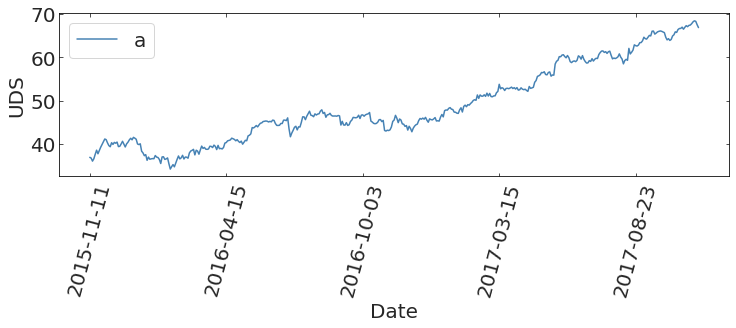

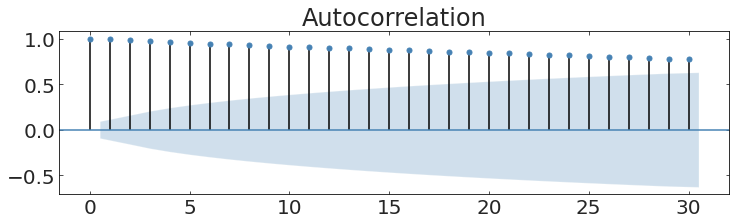

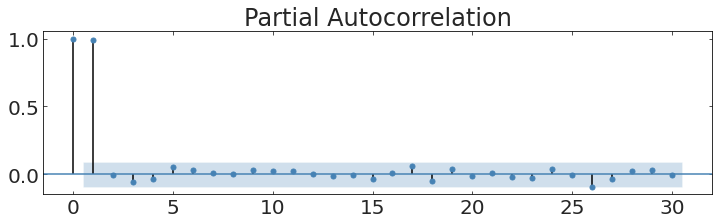

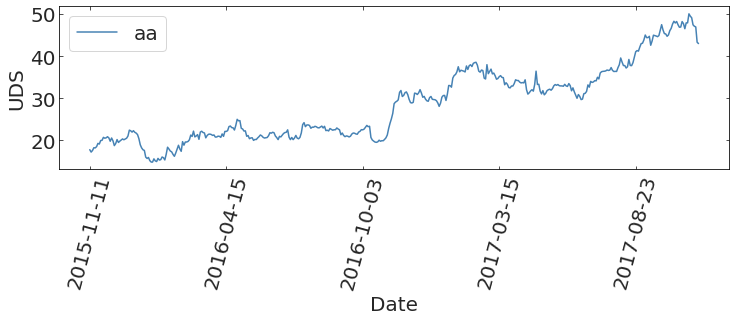

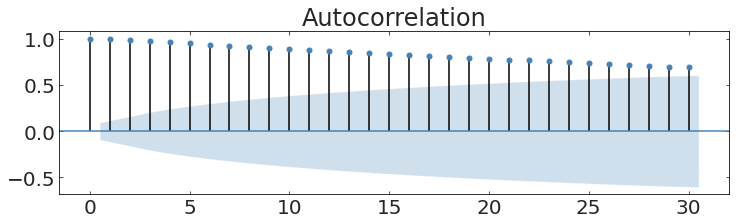

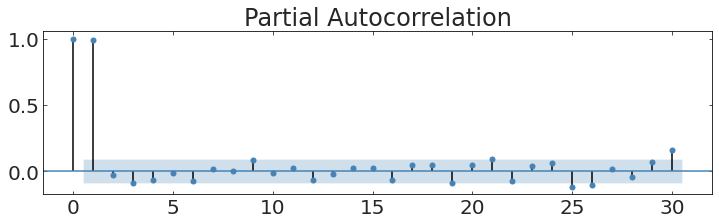

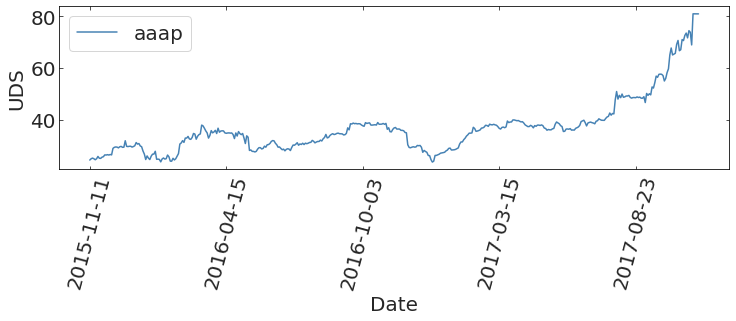

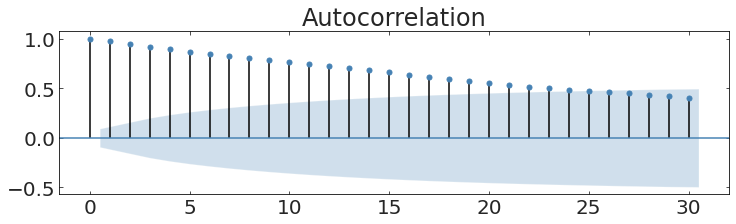

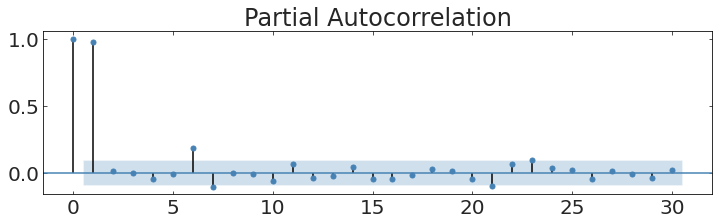

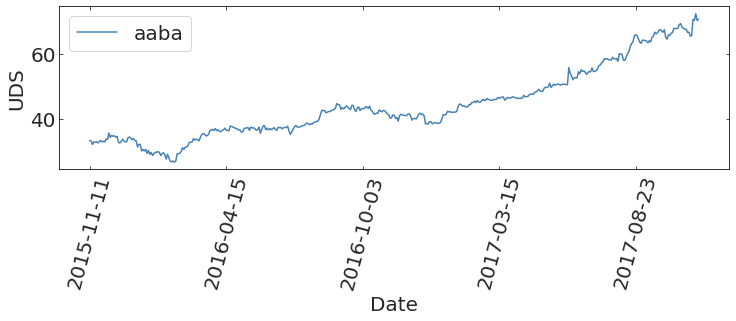

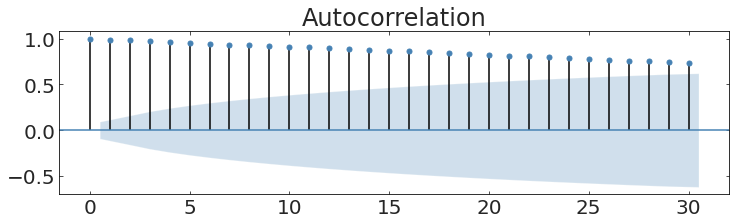

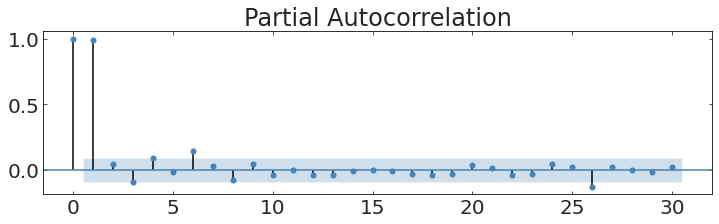

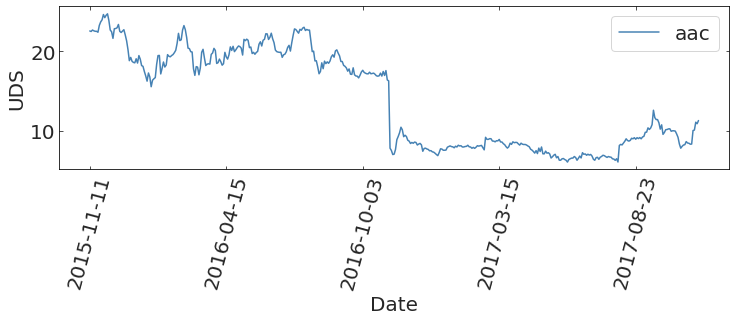

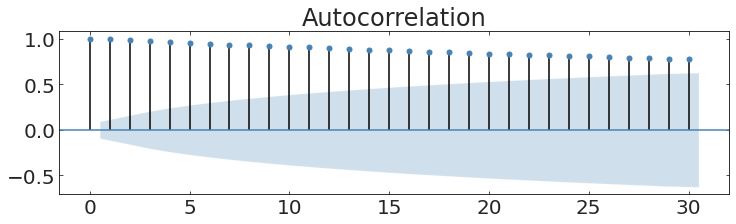

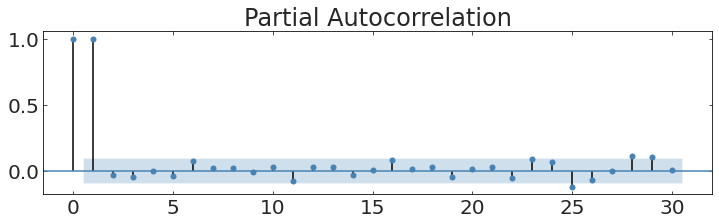

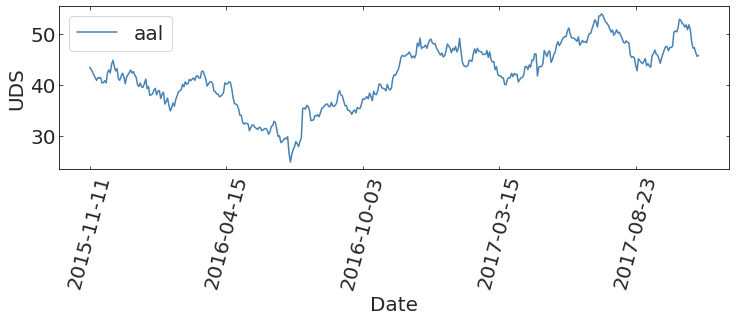

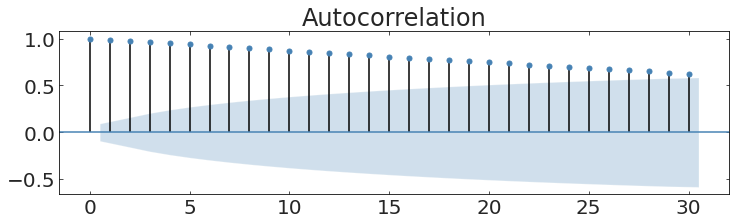

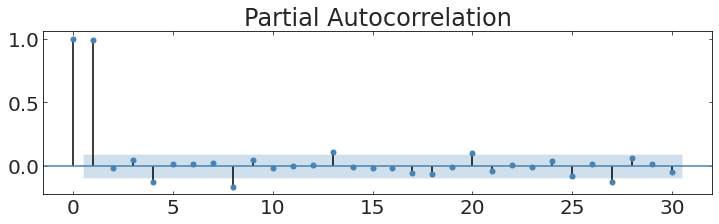

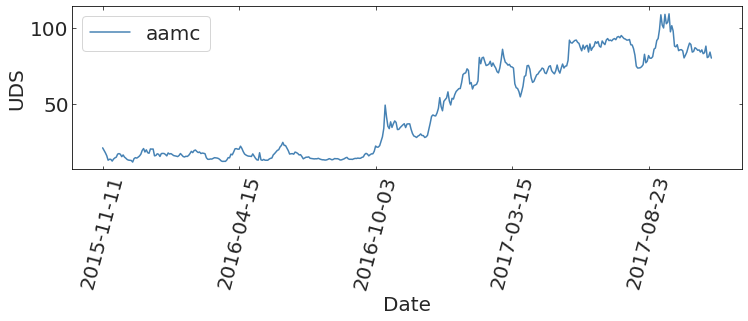

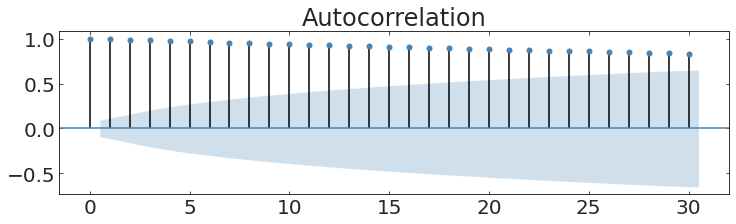

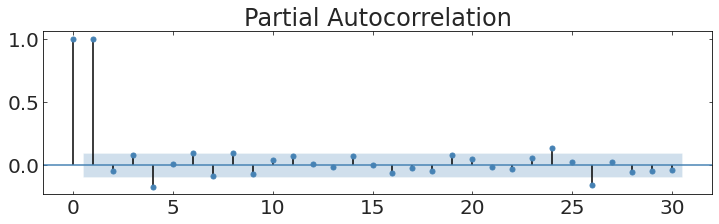

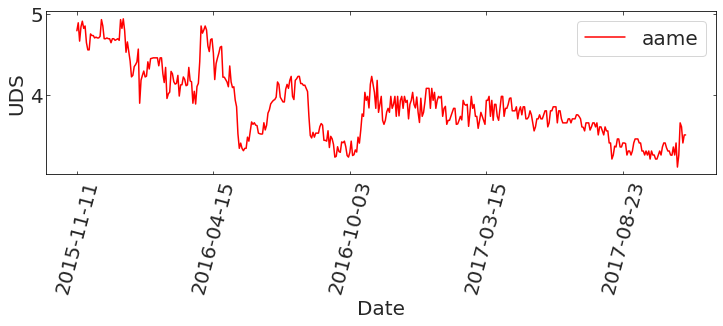

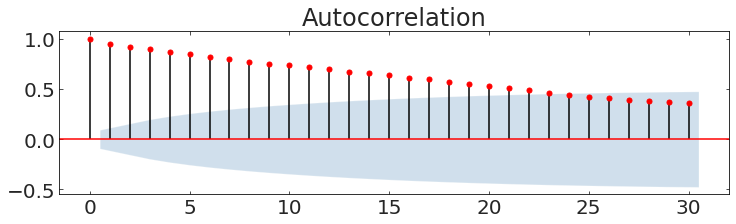

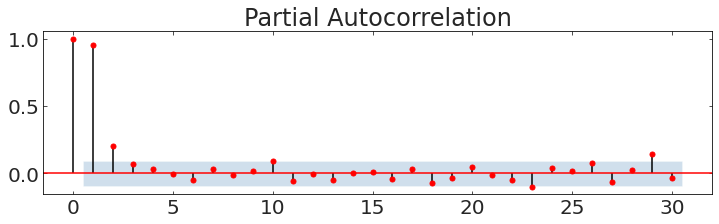

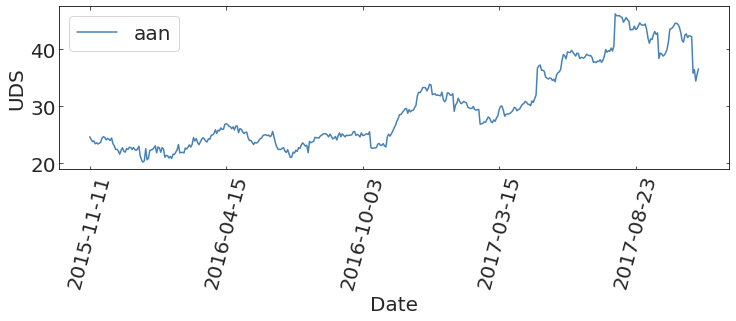

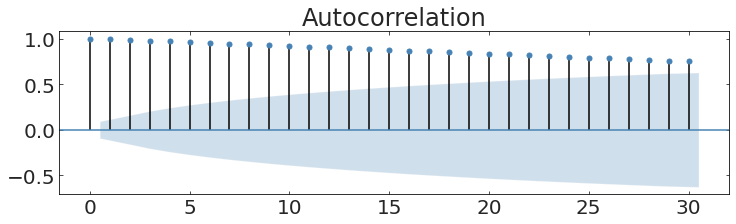

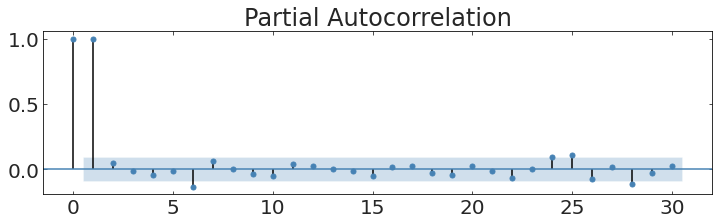

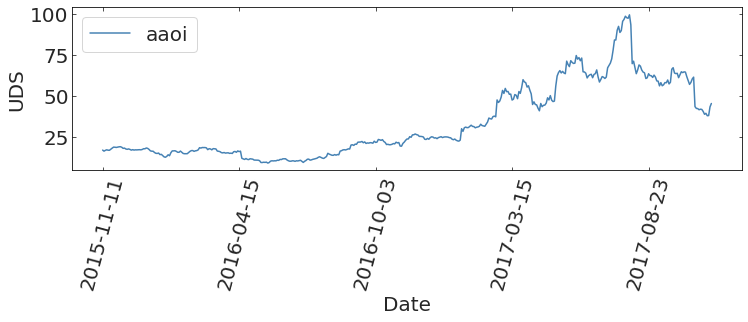

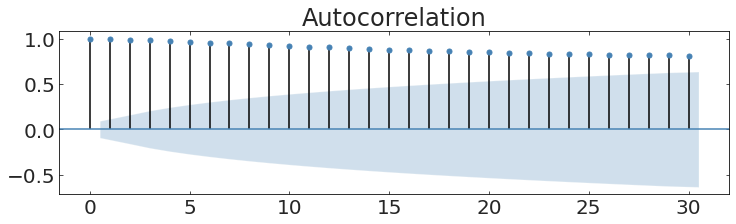

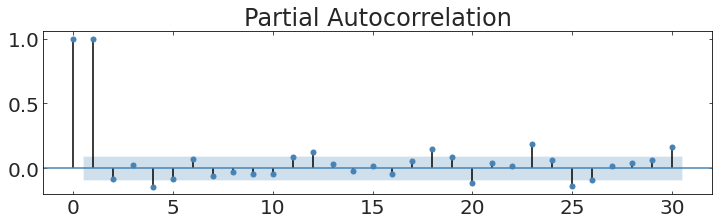

In [11]:
for i in tss.columns:
  pvalue = sm.tsa.stattools.adfuller(tss[i])[1]
  if pvalue <= threshold:
    tss.plot(y = i, rot=75, figsize=(12,3), color = 'r');
    pl.ylabel("UDS", fontsize=20)
    ax = pl.figure(figsize=(12,3)).add_subplot(111)
    sm.graphics.tsa.plot_acf(tss[i], lags=30, ax=ax, color = 'r')
    ax = pl.figure(figsize=(12,3)).add_subplot(111)
    fig = sm.graphics.tsa.plot_pacf(tss[i], lags=30, ax=ax, color = 'r');
  else:
    tss.plot(y = i, rot=75, figsize=(12,3));
    pl.ylabel("UDS", fontsize=20)
    ax = pl.figure(figsize=(12,3)).add_subplot(111)
    sm.graphics.tsa.plot_acf(tss[i], lags=30, ax=ax)
    ax = pl.figure(figsize=(12,3)).add_subplot(111)
    fig = sm.graphics.tsa.plot_pacf(tss[i], lags=30, ax=ax);

Fig. 4. 

Question 2: pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made

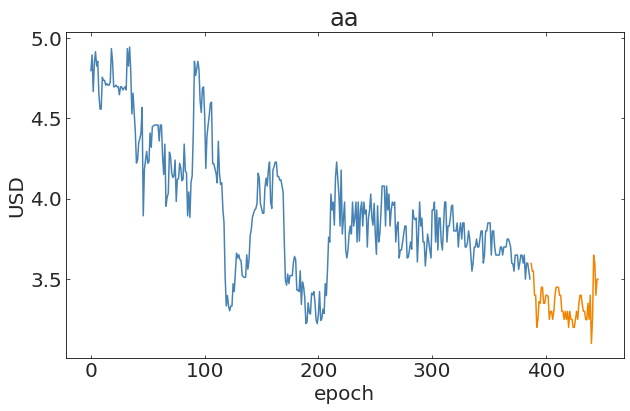

In [146]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"aame"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aame"][-60:]);
pl.title("aa")
pl.xlabel("epoch")
pl.ylabel("USD");

In [16]:
sm.tsa.ARMA?

In [20]:
mod = sm.tsa.ARMA(tss[['aame']], (1,1)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   aame   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Tue, 01 Mar 2022   AIC                           -594.115
Time:                        02:44:23   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

In [148]:
mod = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (2,2)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   aame   No. Observations:                  387
Model:                     ARMA(2, 2)   Log Likelihood                 249.313
Method:                       css-mle   S.D. of innovations              0.127
Date:                Tue, 01 Mar 2022   AIC                           -486.625
Time:                        04:09:33   BIC                           -462.875
Sample:                             0   HQIC                          -477.208
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9929      0.183     21.791      0.000       3.634       4.352
ar.L1.aame     0.5632      1.362      0.413      0.680      -2.107       3.233
ar.L2.aame     0.4032      1.330      0.303      0.762      -2.204       3.011
ma.L1.aame     0.1494      1.363      0.110      0.913      -2.522       2.821
ma.L2.aame    -0.1014      0.364     -0.279      0.781      -0.815       0.612
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0243           +0.0000j            1.0243            0.0000
AR.2           -2.4210           +0.0000j            2.4210            0.5000
MA.1           -2.4887           +0.0000j            2.4887            0.5000
MA.2            3.9621           +0.0000j            3.9621            0.0000
-----------------------------------------------------------------------------
"""

In [151]:
aics = np.zeros((5,5))
for p in range(0,5):
  for q in range(0,4): #for some reason it breaks if i put in range (5)
    aics[p,q] = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (p, q)).fit().aic

In [154]:
aics[0,4] = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (0, 4)).fit().aic
aics[1,4] = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (1, 4)).fit().aic
#aics[2,4] = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (2, 4)).fit().aic
#aics[3,4] = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (3, 4)).fit().aic
aics[4,4] = sm.tsa.ARMA(tss.loc[:,'aame'][:-60], (4, 4)).fit().aic


In [125]:
aics

array([[ 522.01962759,  106.2349101 , -130.21340757, -245.70555257,
        -323.71484051],
       [-568.13070573, -594.11492188, -592.25827415, -590.43749486,
        -588.55361086],
       [-591.47273869, -592.27925171, -590.17488451, -588.4783452 ,
           0.        ],
       [-591.54668302, -590.38288675, -588.42529716, -593.8307997 ,
           0.        ],
       [-590.49404637, -588.51597313, -586.55835488, -591.46676874,
        -589.7749582 ]])

In [142]:
print("best parameters: ", 'p =', int(np.where(aics == np.nanmin(aics))[0]), ', q =', int(np.where(aics == np.nanmin(aics))[1]))

best parameters:  p = 1 , q = 1


In [143]:
N = tss[['aame']].shape[0]

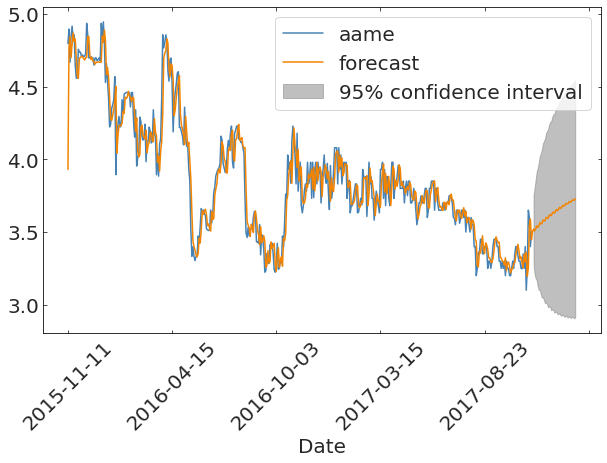

In [145]:
ax = tss[['aame']].plot()
mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);